#### Analise do impacto socioeconômico e racial na pandemia da COVID19 no Brasil
#### Feito por Lucca Santiago e Gabriel Texeira
#### Os dados, até a data do presente estudo, estão no https://opendatasus.saude.gov.br/dataset/bd-srag-2020
#### O presente arquivo é de 30 de junho. 
#### Aviso Legal: Este notebook tem como finalidade apenas o estudo, deste modo não há garantia de qualquer tipo de precisão, confiabilidade ou atualidade das informações.



In [2]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [3]:
filename = r'C:\Users\lucca\Downloads\INFLUD-30-06-2020.csv'
df = pd.read_csv(filename, delimiter=';', 
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

c:\users\lucca\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(356188, 134)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356188 entries, 0 to 356187
Columns: 134 entries, DT_NOTIFIC to PAC_DSCBO
dtypes: float64(76), int64(10), object(48)
memory usage: 364.1+ MB


In [6]:
# Tabelas de microdados usam números, faço a correspondência desses números com seus significados
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}
troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

troca_zona = {1.0:'Urbana', 2.0:'Rural', 3.0:'Periurbana', 9.0:'Ignorado'}

In [7]:
df.loc[(df.CS_ZONA.isnull()), 'CS_ZONA'] = 9
df['CS_ZONA'] = df['CS_ZONA'].apply(lambda x: troca_zona[x])
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])
df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])
df.SEM_NOT = df.SEM_NOT.apply(pd.to_numeric, errors='coerce')
df['DT_NOTIFIC'].dropna(inplace=True)

 1° grafico: número de casos de Síndrome Respiratória Aguda Grave divididos por estados.

Text(0.5, 1.0, 'Casos SRAG nos Estados')

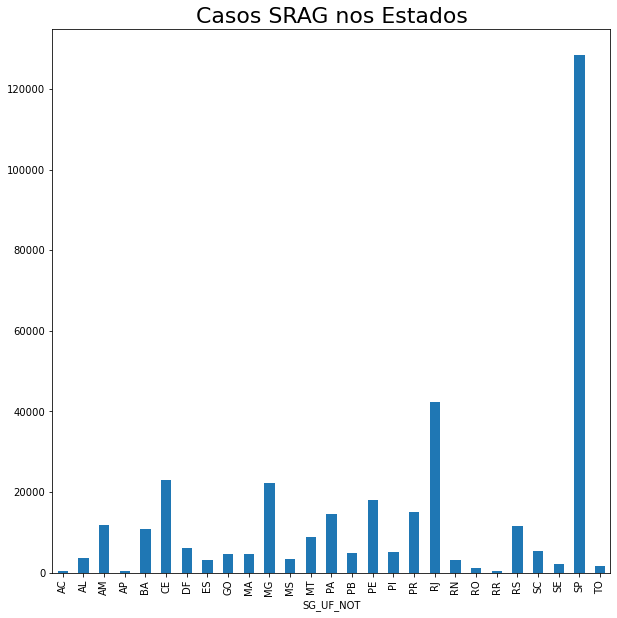

In [8]:
df.groupby(['SG_UF_NOT']).size().tail(27).plot( kind='bar', figsize=(10,10)).set_title('Casos SRAG nos Estados', fontsize=22)

 2° grafico: número de casos de confirmados de COVID19 dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça')

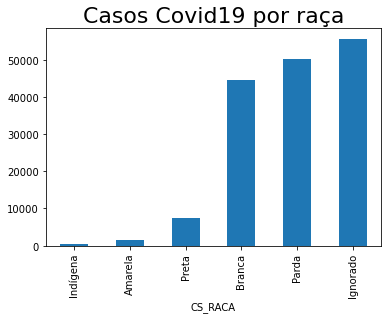

In [9]:
df.query('CLASSI_FIN=="5"').groupby('CS_RACA').size().sort_values().plot(kind='bar').set_title('Casos Covid19 por raça', fontsize=22)

 3° grafico: número de casos de Síndrome Respiratória Aguda Grave no estado de São Paulo dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Estado de São Paulo')

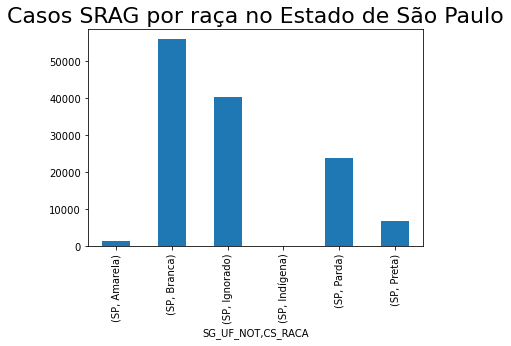

In [10]:
df.query('SG_UF_NOT == "SP"').groupby(['SG_UF_NOT','CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos SRAG por raça no Estado de São Paulo', fontsize=22)

 4° grafico: número de casos de confirmados de COVID19 no estado de São Paulo dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Estado de São Paulo')

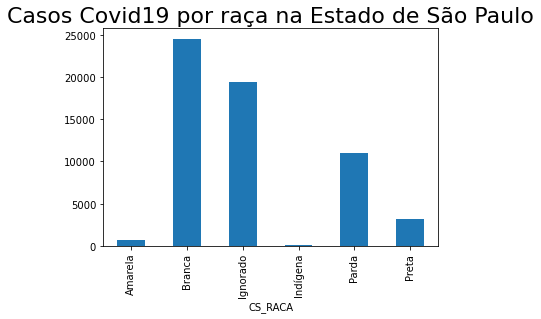

In [11]:
df.query('SG_UF_NOT == "SP" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Estado de São Paulo', fontsize=22)

5° grafico: número de casos de confirmados de COVID19 na cidade de São Paulo dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de São Paulo')

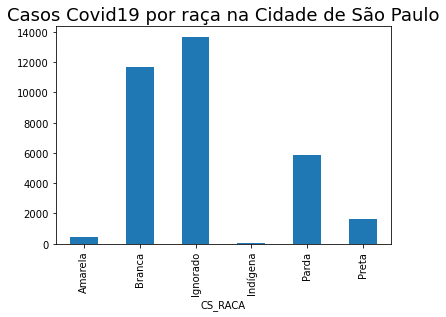

In [12]:
df.query('ID_MUNICIP == "SAO PAULO" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de São Paulo', fontsize=18)

6° grafico: número de casos de confirmados de COVID19 na cidade de Osasco dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de Osasco')

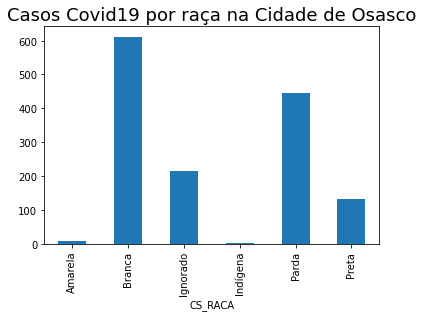

In [13]:
df.query('ID_MUNICIP == "OSASCO" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de Osasco', fontsize=18)

7° grafico: número de casos de confirmados de COVID19 na cidade de São José Dos Campos dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de São José Dos Campos')

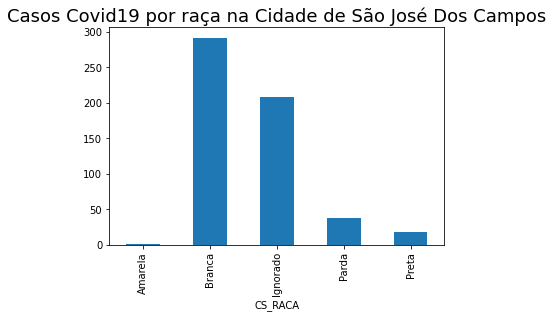

In [14]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de São José Dos Campos', fontsize=18)

8° grafico: número de casos de confirmados de COVID19 na cidade de Caçapava dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade de Caçapava')

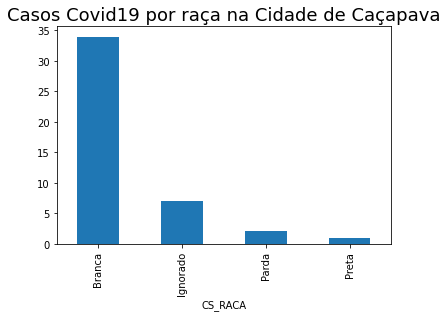

In [15]:
df.query('ID_MUNICIP == "CACAPAVA" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade de Caçapava', fontsize=18)

 9° grafico: número de casos de confirmados de Síndrome Respiratória Aguda Grave no estado de Minas Gerais dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Estado de Minas Gerais')

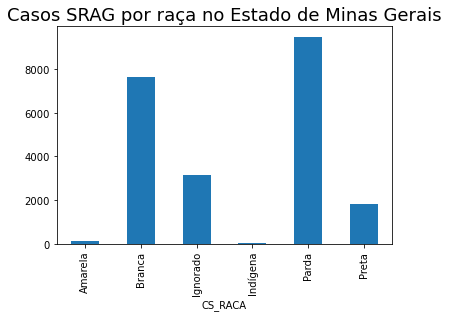

In [16]:
df.query('SG_UF_NOT == "MG"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos SRAG por raça no Estado de Minas Gerais', fontsize=18)

10° grafico: número de casos de confirmados de COVID19 no estado de Minas Gerais dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça no Estado de Minas Gerais')

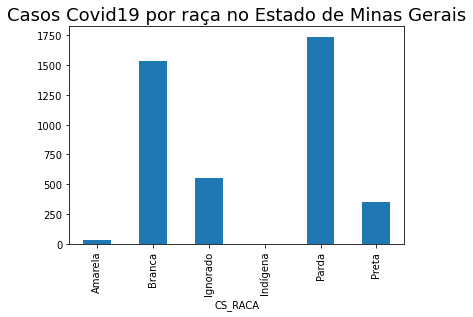

In [17]:
df.query('SG_UF_NOT == "MG" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça no Estado de Minas Gerais', fontsize=18)

 11° grafico: número de casos de confirmados de Síndrome Respiratória Aguda Grave no estado do Rio De Janeiro dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Estado do Rio De Janeiro')

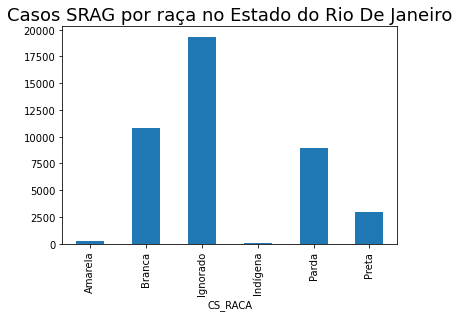

In [18]:
df.query('SG_UF_NOT == "RJ"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos SRAG por raça no Estado do Rio De Janeiro', fontsize=18)

12° grafico: número de casos de confirmados de COVID19 no estado do Rio De Janeiro dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça no Estado do Rio De Janeiro')

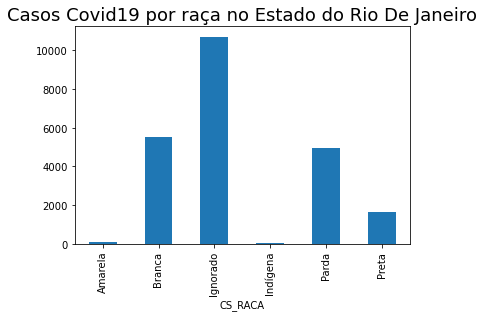

In [19]:
df.query('SG_UF_NOT == "RJ" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça no Estado do Rio De Janeiro', fontsize=18)

13° grafico: número de casos de confirmados de COVID19 na cidade de Melgaço dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade De Melgaço')

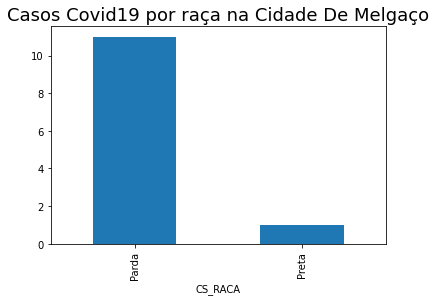

In [20]:
df.query('ID_MUNICIP == "MELGACO" and CLASSI_FIN=="5"').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade De Melgaço', fontsize=18)

14° grafico: número de casos de confirmados de COVID19 na cidade de São Caetano Do Sul dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça na Cidade De São Caetano Do Sul')

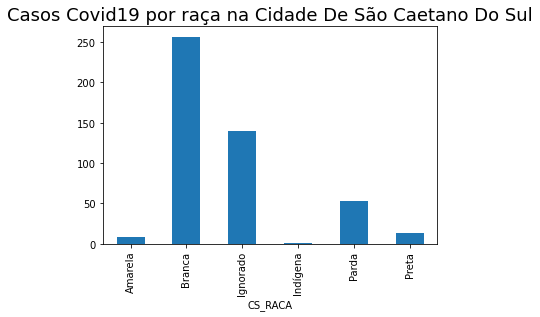

In [21]:
df.query('ID_MUNICIP == "SAO CAETANO DO SUL" and CLASSI_FIN=="5" ').groupby(['CS_RACA']).size().tail(6).plot(kind='bar').set_title('Casos Covid19 por raça na Cidade De São Caetano Do Sul', fontsize=18)

 15° grafico: número de casos de confirmados de Síndrome Respiratória Aguda Grave no Pronto Socorro Municipal (SJC) dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Pronto Socorro Municipal (SJC)')

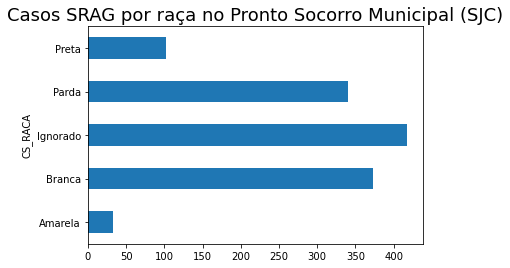

In [22]:
df.query('ID_UNIDADE == "PRONTO SOCORRO MUNICIPAL"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos SRAG por raça no Pronto Socorro Municipal (SJC)', fontsize=18)

 16° grafico: número de casos de confirmados de COVID19 no Pronto Socorro Municipal (SJC)
dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Pronto Socorro Municipal (SJC)')

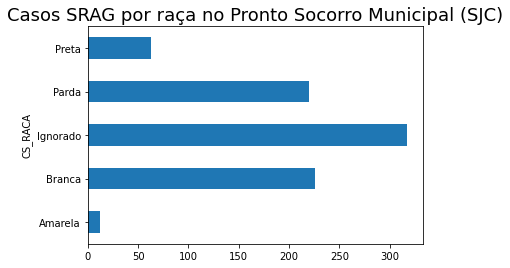

In [23]:
df.query('ID_UNIDADE == "PRONTO SOCORRO MUNICIPAL" and CLASSI_FIN=="5"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos SRAG por raça no Pronto Socorro Municipal (SJC)', fontsize=18)

 17° grafico: número de casos de confirmados de COVID19 no Pronto Socorro Municipal (SJC)
dividido por raça e nivel de ensino.

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino no Pronto Socorro Municipal (SJC)')

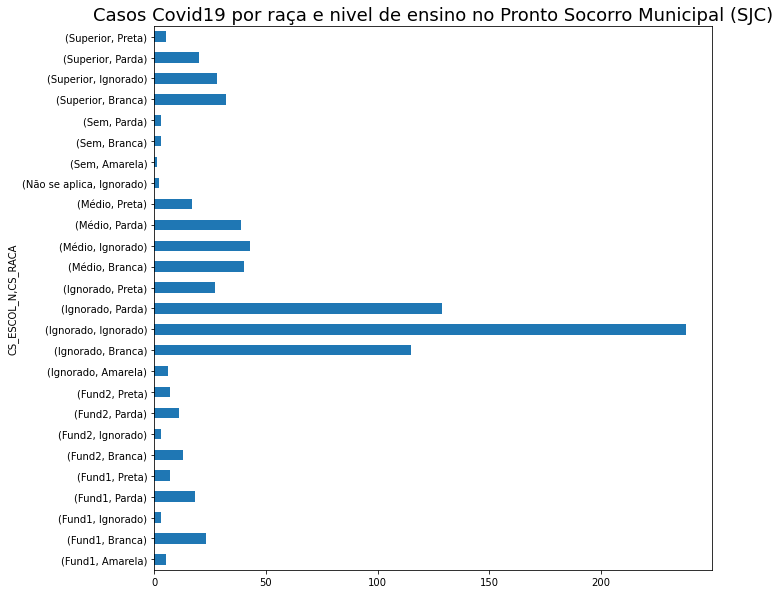

In [24]:
df.query('ID_UNIDADE == "PRONTO SOCORRO MUNICIPAL" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino no Pronto Socorro Municipal (SJC)', fontsize=18)

 18° grafico: número de casos de confirmados de Síndrome Respiratória Aguda Grave no SMS UPA 24H ROCINHA AP 21 (RJ) dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no SMS UPA 24H ROCINHA AP 21 (RJ)')

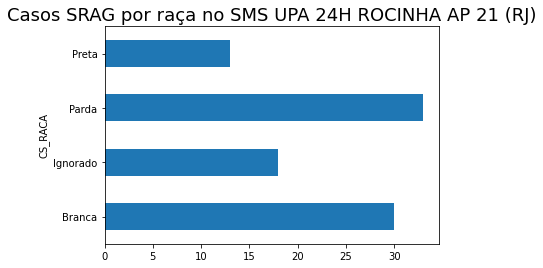

In [25]:
df.query('ID_UNIDADE == "SMS UPA 24H ROCINHA AP 21"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos SRAG por raça no SMS UPA 24H ROCINHA AP 21 (RJ)', fontsize=18)

 19° grafico: número de casos de confirmados de COVID19 no SMS UPA 24H ROCINHA AP 21 (RJ) dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça no SMS UPA 24H ROCINHA AP 21 (RJ)')

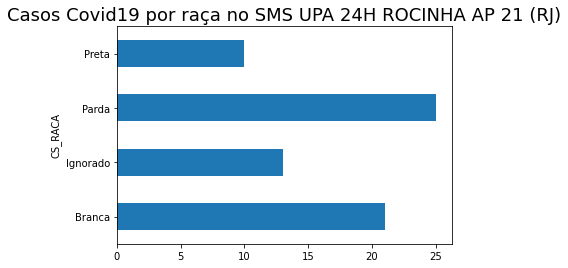

In [26]:
df.query('ID_UNIDADE == "SMS UPA 24H ROCINHA AP 21" and CLASSI_FIN=="5"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos Covid19 por raça no SMS UPA 24H ROCINHA AP 21 (RJ)', fontsize=18)

 20° grafico: número de casos de confirmados de Síndrome Respiratória Aguda Grave no Hospital Villa Lobos (SP) dividido por raça.

Text(0.5, 1.0, 'Casos SRAG por raça no Hospital Villa Lobos (SP)')

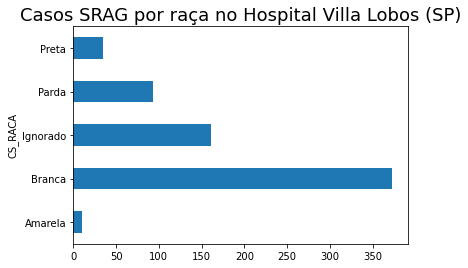

In [27]:
df.query('ID_UNIDADE == "HOSPITAL VILLA LOBOS"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos SRAG por raça no Hospital Villa Lobos (SP)', fontsize=18)

 21° grafico: número de casos de confirmados de COVID19 no Hospital Villa Lobos (SP) dividido por raça.

Text(0.5, 1.0, 'Casos Covid19 por raça no Hospital Villa Lobos (SP)')

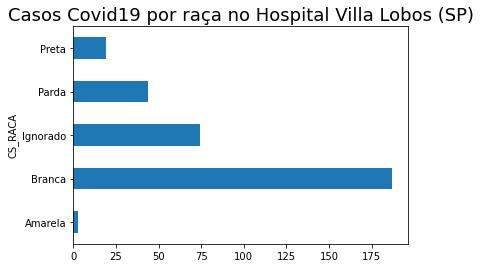

In [28]:
df.query('ID_UNIDADE == "HOSPITAL VILLA LOBOS" and CLASSI_FIN=="5"').groupby(['CS_RACA']).size().tail(6).plot(kind='barh').set_title('Casos Covid19 por raça no Hospital Villa Lobos (SP)', fontsize=18)

 22° grafico: número de casos de confirmados de COVID19 no Hospital Villa Lobos (SP) dividido por raça e nivel de ensino.

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino no Hospital Villa Lobos (SP)')

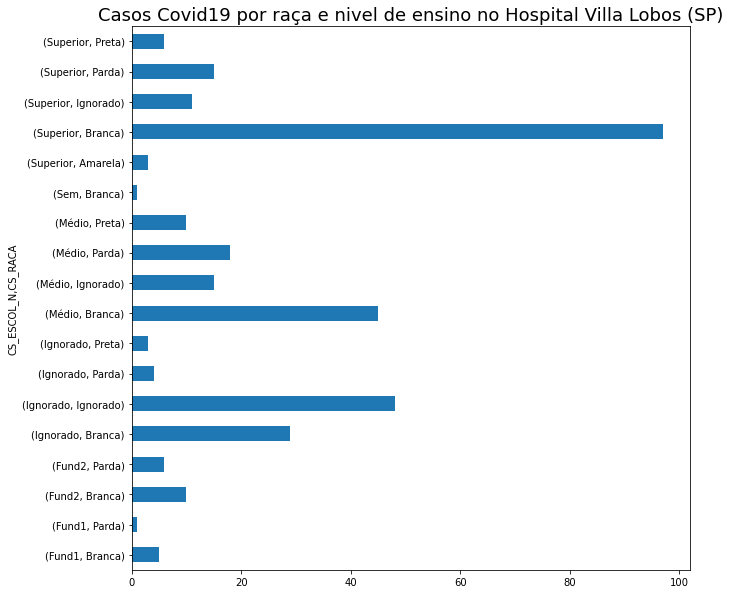

In [29]:
df.query('ID_UNIDADE == "HOSPITAL VILLA LOBOS" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino no Hospital Villa Lobos (SP)', fontsize=18)


23° grafico: número de casos de confirmados de COVID19 na cidade de Caçapava dividido por raça e nivel de ensino.

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino na Cidade de Caçapava')

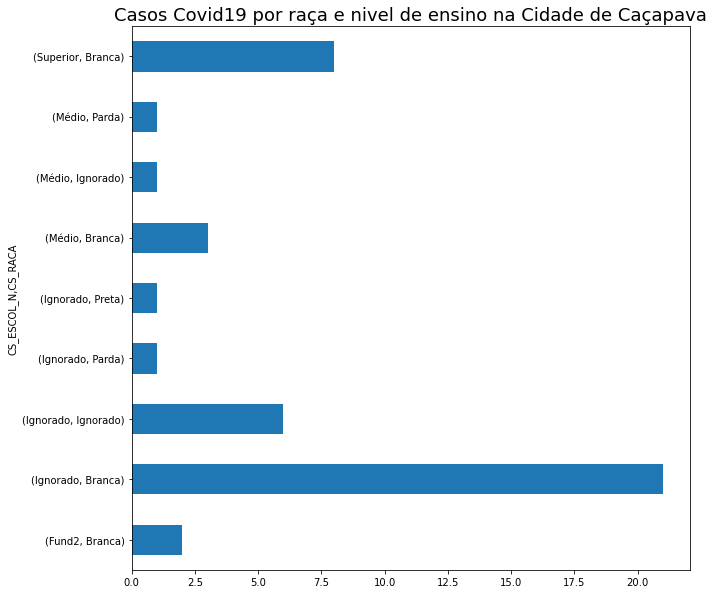

In [30]:
df.query('ID_MUNICIP == "CACAPAVA" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino na Cidade de Caçapava', fontsize=18)

24° grafico: número de casos de confirmados de COVID19 na cidade de São Paulo dividido por raça e nivel de ensino.

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino na Cidade de São Paulo ')

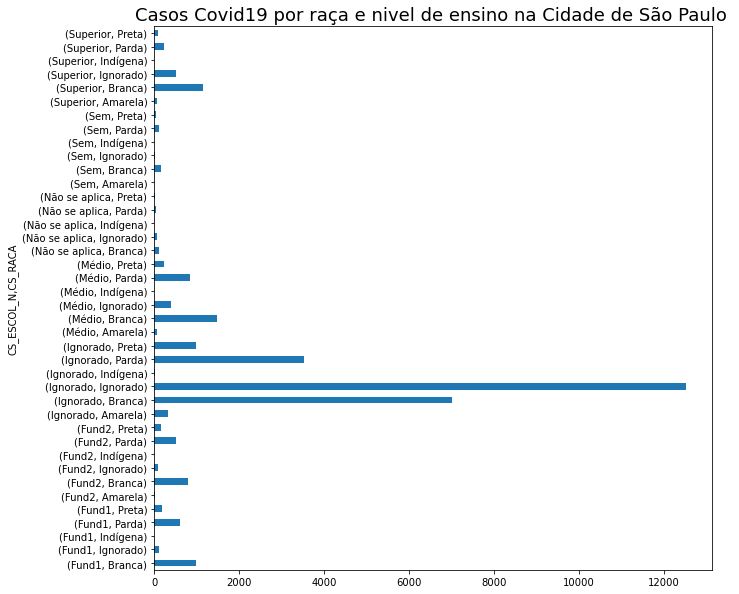

In [31]:
df.query('ID_MUNICIP == "SAO PAULO" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino na Cidade de São Paulo ', fontsize=18)


25° grafico: número de casos de confirmados de COVID19 na cidade de São José Dos Campos dividido por raça e nivel de ensino.

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino na Cidade de São José Dos Campos ')

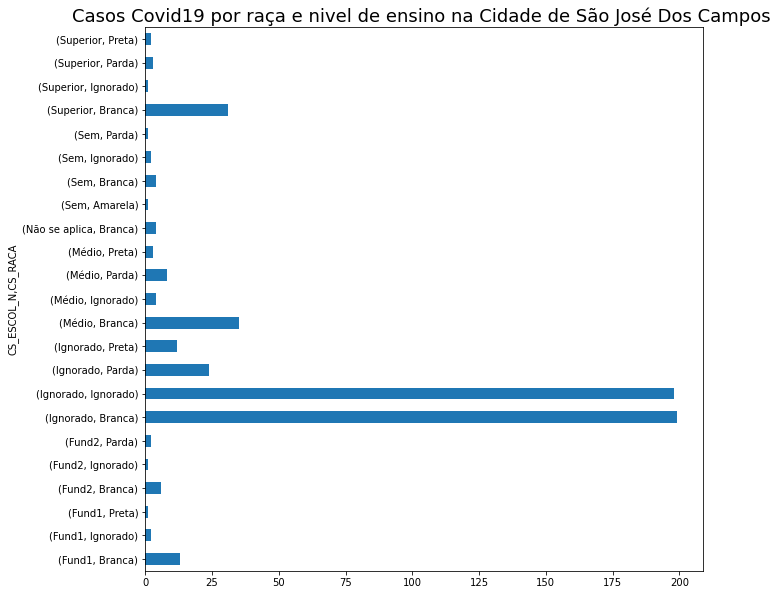

In [32]:
df.query('ID_MUNICIP == "SAO JOSE DOS CAMPOS" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino na Cidade de São José Dos Campos ', fontsize=18)

26° grafico: número de casos de confirmados de COVID19 na cidade de Osasco dividido por raça e nivel de ensinoú

Text(0.5, 1.0, 'Casos Covid19 por raça e nivel de ensino na Cidade de Osasco')

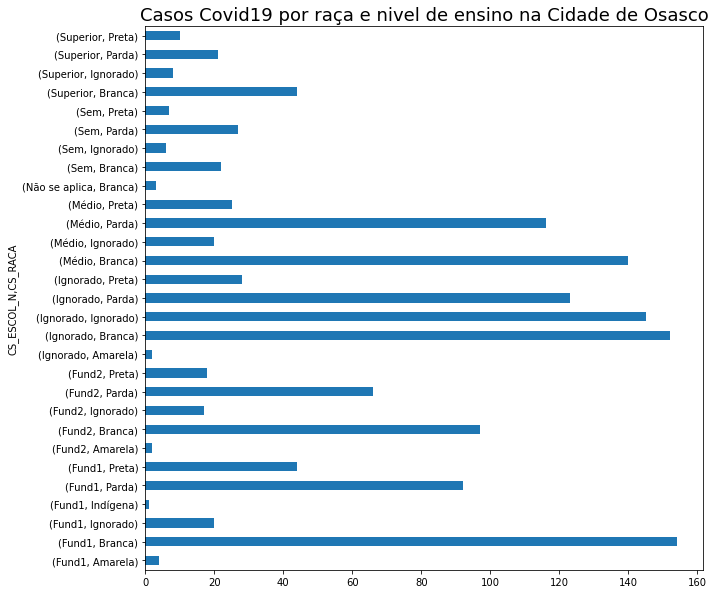

In [33]:
df.query('ID_MUNICIP == "OSASCO" and CLASSI_FIN=="5"').groupby(['CS_ESCOL_N','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e nivel de ensino na Cidade de Osasco', fontsize=18)


27° grafico: número de casos de confirmados de COVID19 no estado do Rio De Janeira divivido por raça e zona geográfica.

Text(0.5, 1.0, 'Casos Covid19 por raça e zona geográfica no Estado do Rio De Janeiro')

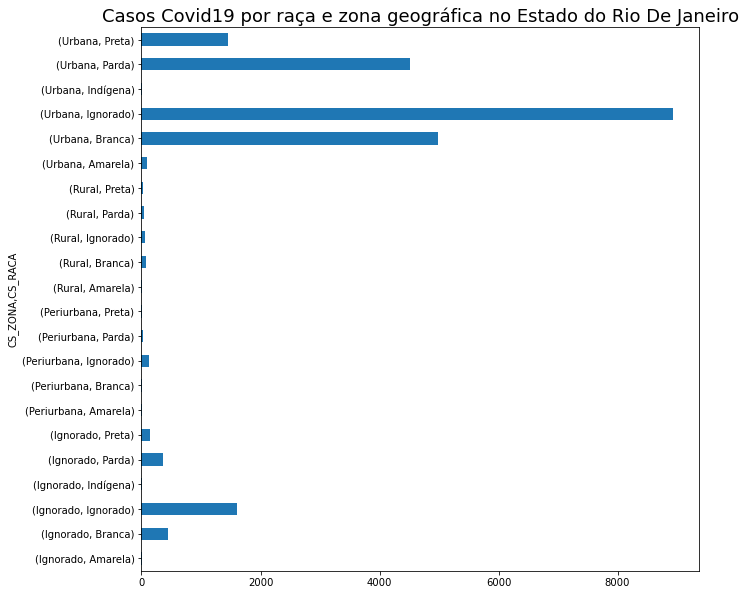

In [34]:
df.query('SG_UF_NOT == "RJ" and CLASSI_FIN=="5"').groupby(['CS_ZONA','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e zona geográfica no Estado do Rio De Janeiro', fontsize=18)


28° grafico: número de casos de confirmados de COVID19 no estado de São Paulo divivido por raça e zona geográfica.

Text(0.5, 1.0, 'Casos Covid19 por raça e zona geográfica no Estado de São Paulo')

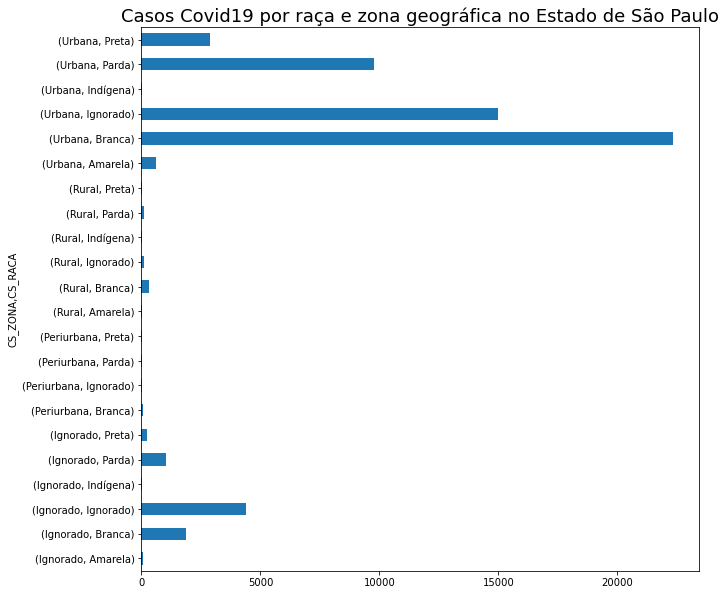

In [35]:
df.query('SG_UF_NOT == "SP" and CLASSI_FIN=="5"').groupby(['CS_ZONA','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e zona geográfica no Estado de São Paulo', fontsize=18)


30° grafico: número de casos de confirmados de COVID19 no estado de Minas Gerais divivido por raça e zona geográfica.

Text(0.5, 1.0, 'Casos Covid19 por raça e zona geográfica no Estadode Minas Gerais')

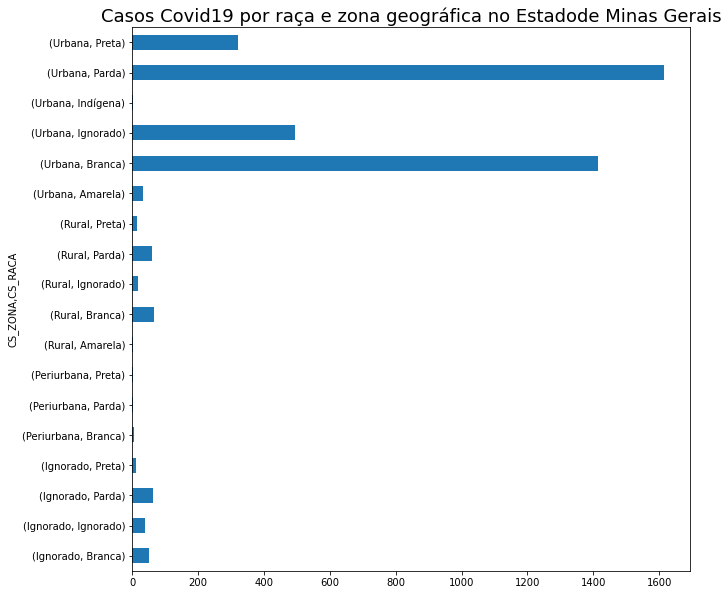

In [36]:
df.query('SG_UF_NOT == "MG" and CLASSI_FIN=="5"').groupby(['CS_ZONA','CS_RACA']).size().tail(40).plot(kind='barh', figsize=(10,10)).set_title('Casos Covid19 por raça e zona geográfica no Estadode Minas Gerais', fontsize=18)
